<a href="https://colab.research.google.com/github/Haedeskerbex/ML-GA-Motif-Discovery/blob/main/MutationPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries
!pip install biopython pandas numpy scikit-learn tensorflow torch transformers matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Bio import SeqIO
from Bio.Seq import Seq
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf
import torch
from transformers import AutoModel, AutoTokenizer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.2524 - loss: 1.3869 - val_accuracy: 0.2539 - val_loss: 1.3869
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.2497 - loss: 1.3865 - val_accuracy: 0.2524 - val_loss: 1.3862
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.2540 - loss: 1.3863 - val_accuracy: 0.2485 - val_loss: 1.3861
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.2533 - loss: 1.3862 - val_accuracy: 0.2537 - val_loss: 1.3863
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.2515 - loss: 1.3862 - val_accuracy: 0.2519 - val_loss: 1.3862
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.2548 - loss: 1.3861 - val_accuracy: 0.2604 - val_loss: 1.3862
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.2552 - loss: 1.3861 - val_accuracy: 0.2563 - val_loss: 1.3862
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.2559 - loss: 1.3861 - val_accuracy: 0.2625 - v

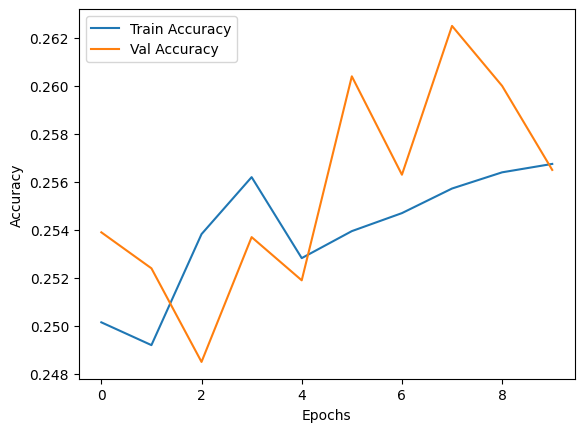

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
Predicted Mutation Sequence: [[3 3 3 3 3 3 3 0 0 0 0 0 0 0 3 3 3 3 1 1 1 1 1 2 2 2 2 0 0 0 1 3 3 3 3 0
  3 3 3 3 3 3 3 3 3 3 3 3 3 3]]
Actual Mutation Sequence: [3 3 3 2 3 1 2 2 3 0 0 2 3 3 1 1 1 3 1 1 3 2 1 3 2 0 0 1 1 0 0 2 2 1 3 2 1
 2 1 1 2 1 2 1 1 0 3 3 2 0]


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import matplotlib.pyplot as plt

#Dummy data creation
num_variants = 1000  # Number of past variants
sequence_length = 50  # Length of simplified mutation sequences
num_mutations = 4  # Possible mutation types (A, C, G, T)

# Generate random mutation sequences (encoded as integers 0-3)
X_data = np.random.randint(0, num_mutations, size=(num_variants, sequence_length))
Y_data = np.random.randint(0, num_mutations, size=(num_variants, sequence_length))  # Next possible mutations

# One-hot encoding
X_data_oh = tf.keras.utils.to_categorical(X_data, num_classes=num_mutations)
Y_data_oh = tf.keras.utils.to_categorical(Y_data, num_classes=num_mutations)

# Split into train and test sets
split_idx = int(0.8 * num_variants)
X_train, X_test = X_data_oh[:split_idx], X_data_oh[split_idx:]
Y_train, Y_test = Y_data_oh[:split_idx], Y_data_oh[split_idx:]

# Simple LSTM Model for mutation sequence prediction
model = keras.Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(sequence_length, num_mutations)),
    layers.LSTM(64, return_sequences=True),
    layers.Dense(num_mutations, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Test prediction on random sample
sample_idx = random.randint(0, len(X_test) - 1)
predicted_mutation = model.predict(np.expand_dims(X_test[sample_idx], axis=0))

print("Predicted Mutation Sequence:", np.argmax(predicted_mutation, axis=-1))
print("Actual Mutation Sequence:", np.argmax(Y_test[sample_idx], axis=-1))